# PRCP-1019 Concrete Strength

## Domain: Civil Engineering

## Objective: 

The objective of this project is to develop a predictive model using machine learning techniques to accurately estimate the compressive strength of concrete based on its ingredients (such as cement, water, fine and coarse aggregates, etc.) and curing age. This aims to assist civil engineers and construction professionals in optimizing mix designs, improving quality control, and reducing the need for extensive physical testing.

## 1. Introduction

Concrete Strength Dataset, contains records of concrete mixtures, including quantities of eight components: cement, slag, ash, water, superplasticizer, coarse aggregate, fine aggregate and age (in days). The target variable is the compressive strength (in MPa).

### 1.1 Attribute Description

**Cement (kg/m³):** Primary binding ingredient that contributes to strength development.  
 **Slag:** Industrial byproduct used as a partial cement replacement to improve durability.  
 **Ash:** Pozzolanic material that enhances long-term strength and workability.  
 **Water (kg/m³):** Essential for the hydration process; influences both workability and strength.  
 **Superplasticizer:** Chemical additive that increases fluidity without adding extra water.  
 **Coarse Aggregate:** Large particles (like gravel) that add bulk and load-bearing capacity.  
 **Fine Aggregate:** Smaller particles (like sand) that fill gaps and improve finish.  
 **Age (days):** Time elapsed since casting; strength generally increases with age.  
 **Compressive Strength (MPa):** measures how much load the concrete can bear.

### 1.2 Importance of Compressive Strength Prediction using Machine Learning Algorithms 

This project aims to apply machine learning techniques to predict the compressive strength of concrete based on the given features. Accurate predictions can help engineers optimize concrete mix designs, reduce testing overhead, and ensure material quality before physical implementation.



## 2. Importing the Required Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('concrete.csv')
df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


## 3. Basic Checks

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [5]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


### 3.1 Checking for Null Values

In [6]:
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [7]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [8]:
df.shape

(1030, 9)

### 3.2  Checking  for Duplicate Values

In [9]:
df.duplicated().sum()

25

In [10]:
duplicates_with_index = df[df.duplicated(keep=False)]
print(duplicates_with_index)

     cement   slag  ash  water  superplastic  coarseagg  fineagg  age  \
72    425.0  106.3  0.0  153.5          16.5      852.1    887.1    3   
77    425.0  106.3  0.0  153.5          16.5      852.1    887.1    3   
80    425.0  106.3  0.0  153.5          16.5      852.1    887.1    3   
83    362.6  189.0  0.0  164.9          11.6      944.7    755.8    3   
86    362.6  189.0  0.0  164.9          11.6      944.7    755.8    3   
88    362.6  189.0  0.0  164.9          11.6      944.7    755.8    3   
91    362.6  189.0  0.0  164.9          11.6      944.7    755.8    3   
95    425.0  106.3  0.0  153.5          16.5      852.1    887.1    7   
100   425.0  106.3  0.0  153.5          16.5      852.1    887.1    7   
103   425.0  106.3  0.0  153.5          16.5      852.1    887.1    7   
106   362.6  189.0  0.0  164.9          11.6      944.7    755.8    7   
109   362.6  189.0  0.0  164.9          11.6      944.7    755.8    7   
111   362.6  189.0  0.0  164.9          11.6      9

In [11]:
#Removing the Duplicate Values
df.drop_duplicates(inplace=True)

In [12]:
df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [13]:
# Removing the Target Column
df1 = df.drop('strength', axis=1)
df1

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


## 4. Exploratory Data Analysis

### 4.1 Univarient Analysis

In [14]:
import sweetviz as sv
my_report = sv.analyze(df)
my_report.show_html('sweetviz_report.html')

                                             |                                             | [  0%]   00:00 ->…

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

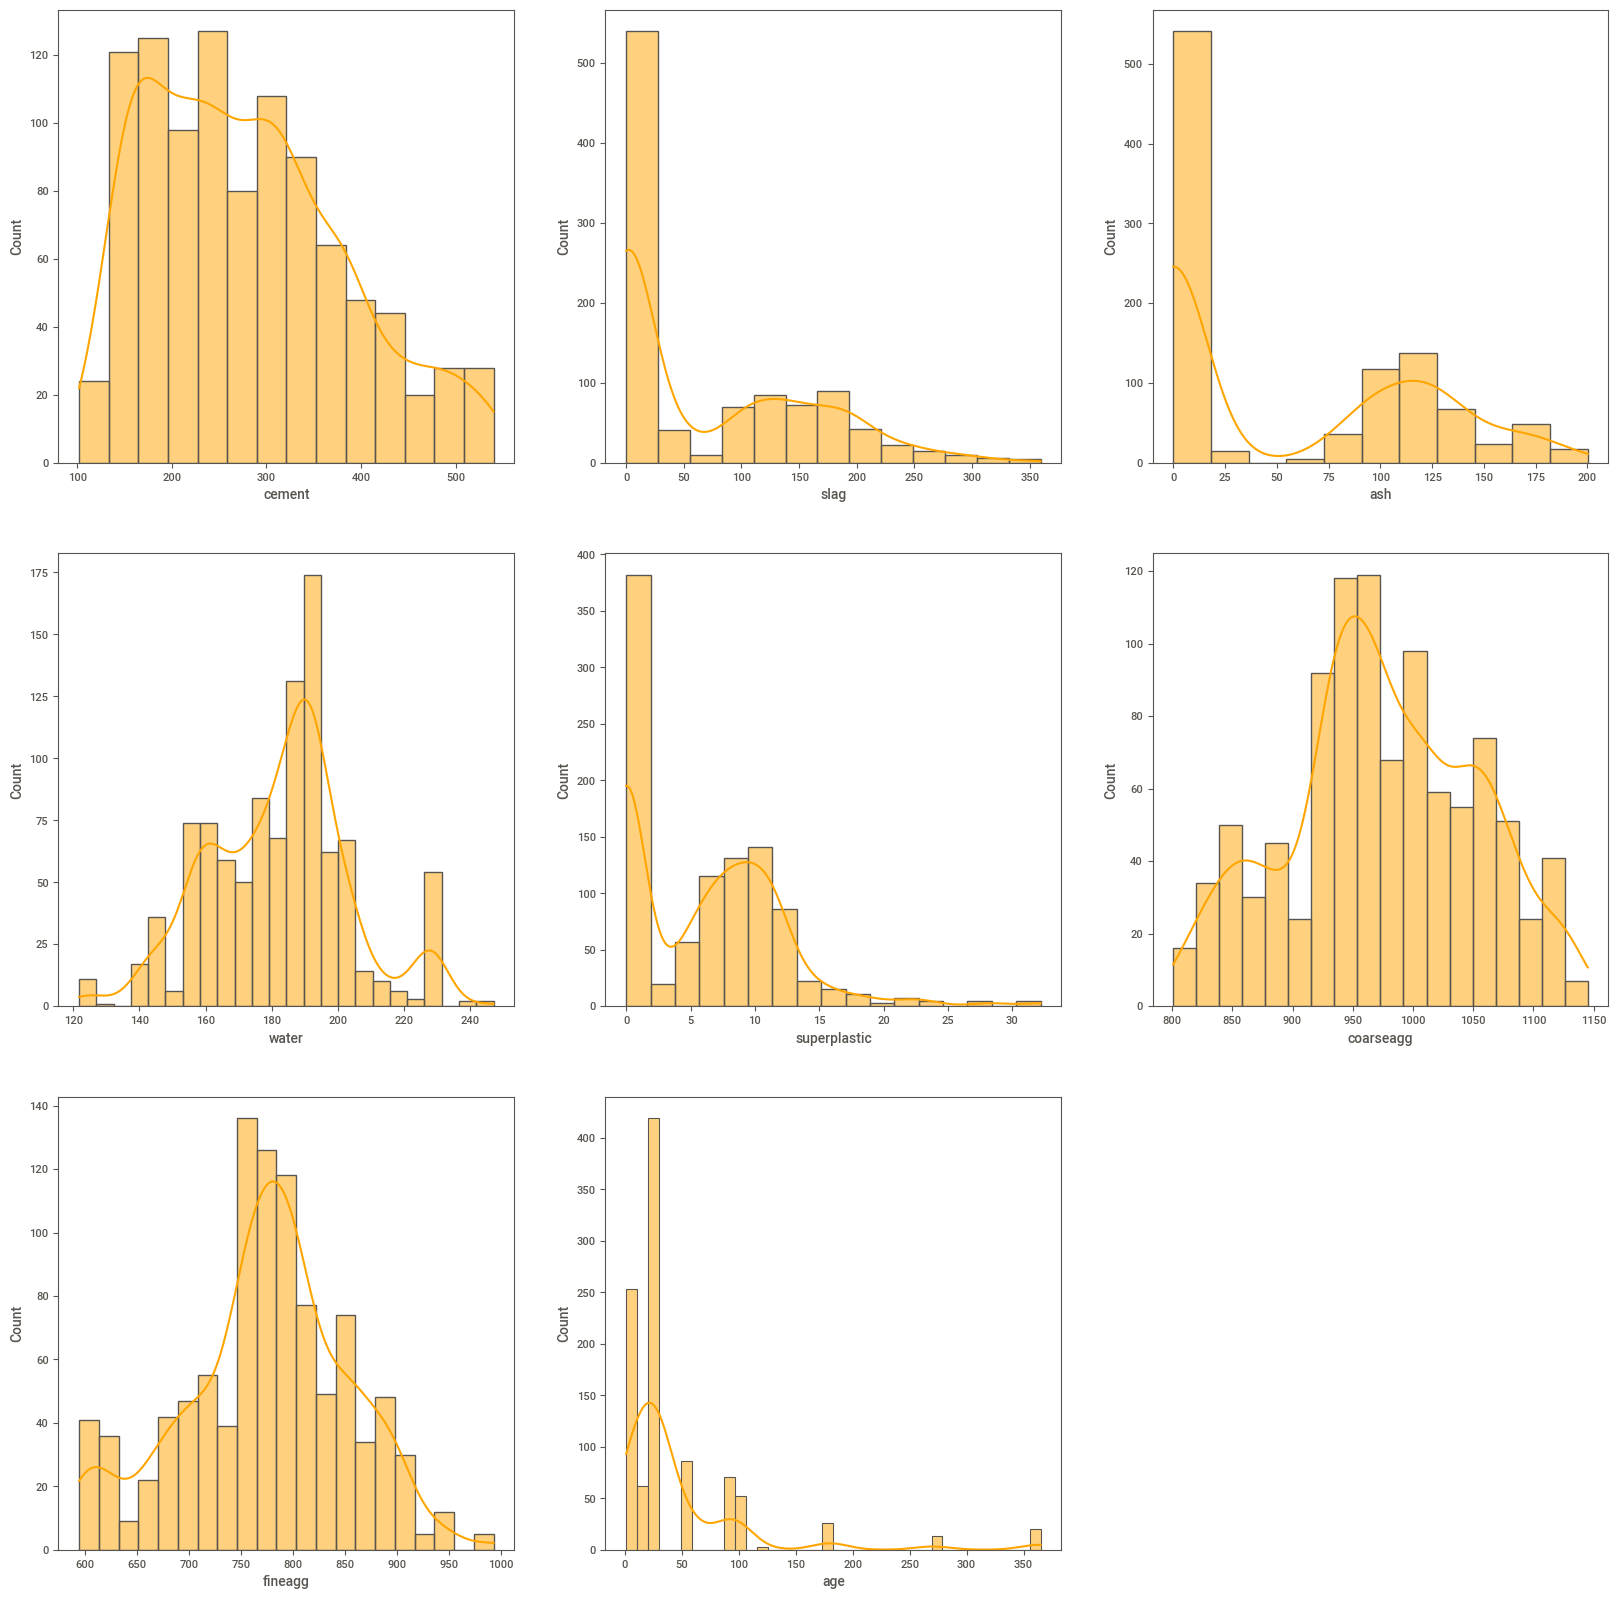

In [15]:
plt.figure(figsize=(20,20))
plotnumber = 1
for i in df1:
    plt.subplot(3,3,plotnumber)
    sns.histplot(x=df[i], kde=True, color='orange')
    plotnumber += 1
plt.tight_layout


**Cement**

-Typically positively skewed.

-Higher cement content often relates to higher compressive strength.

**Slag**

-Many samples have low values; not used in all concrete mixes.

-It shows right-skewed distribution.

**Ash**

-Similar to slag in distribution.

-Often zero in mixes where it is not used.

**Water**

-Mostly normally distributed.

-Higher water content can reduce compressive strength due to increased water-cement ratio.

**Superplasticizer**

-Right-skewed distribution.

-Many entries are 0, indicating it is not used in all mixes.

**Coarse Aggregate**

-Distribution is fairly uniform or slightly skewed.

**Fine Aggregate**

-Similar to coarse aggregate.

-Often normally distributed.

**Age**

-Highly right-skewed.

-Most concrete samples are tested at 1, 3, 7, or 28 days



### 4.2 Bivarient Analysis

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

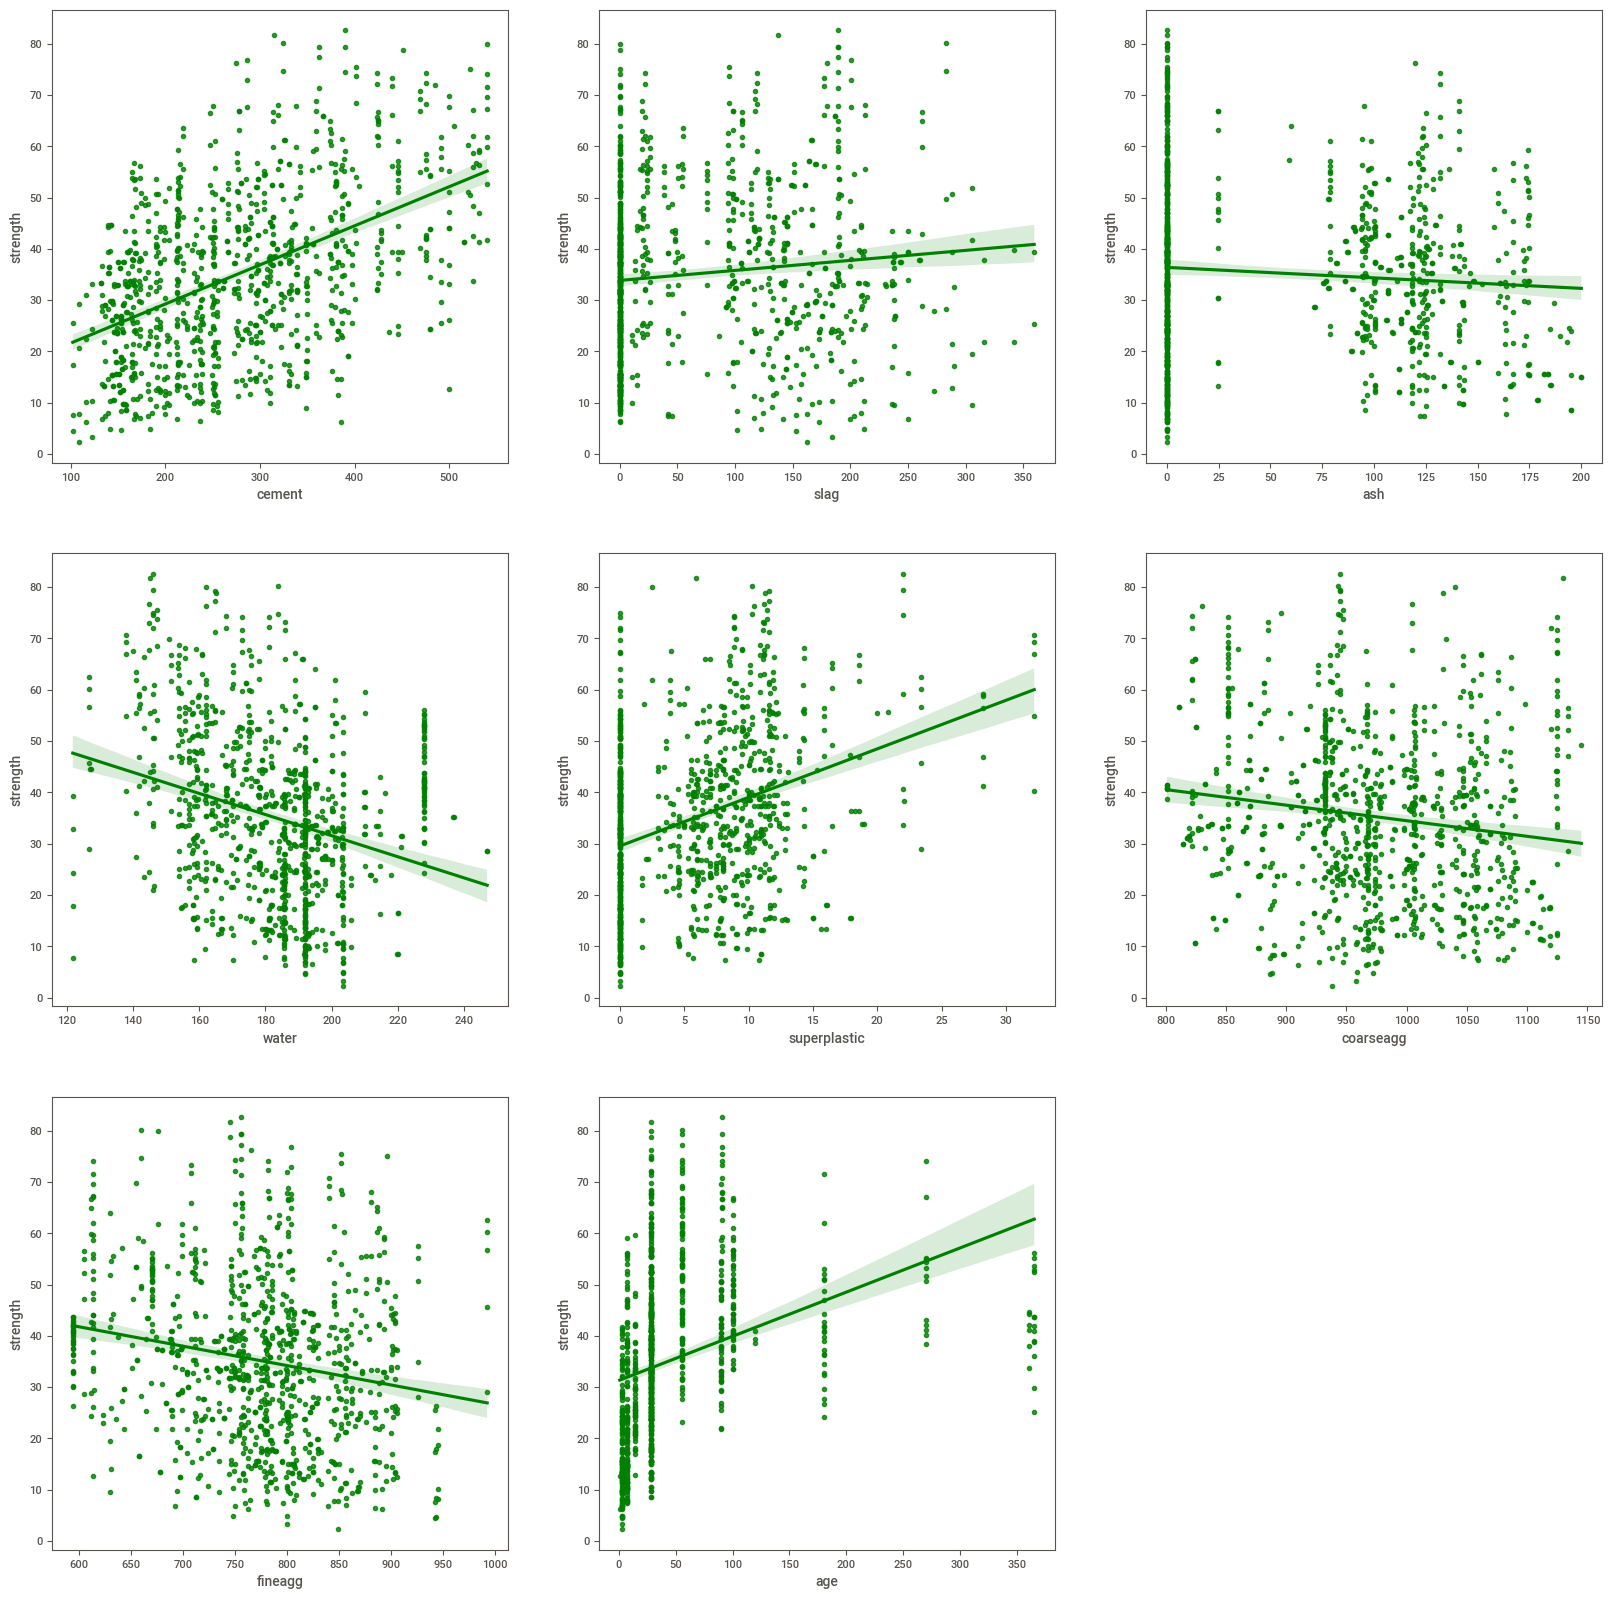

In [16]:
plt.figure(figsize=(20,20))
plotnumber = 1
for i in df1:
    plt.subplot(3,3,plotnumber)
    sns.regplot(x=df[i], y=df.strength, color='green')
    plotnumber += 1
plt.tight_layout


**Cement vs Strength**

-Shows a strong positive relationship with compressive strength.

-Expected to have a high positive correlation.

-Follows a generally linear increasing trend.

**Slag vs Strength**

-Has a moderately positive effect on strength.

-Expected correlation is moderate and positive.

-Strength tends to increase with higher slag content.

**Ash vs Strength**

-Exhibits a weak to moderate positive relationship.

-Correlation is expected to be low to moderate.

-Displays a slight upward trend in strength when used.

**Water vs Strength**

-Shows a negative relationship with compressive strength.

-Expected to have a moderately negative correlation.

-Trend is downward; higher water content lowers strength.

**Superplasticizer vs Strength**

-Has a weak to moderate positive effect.

-Correlation is low to moderate.

-Slight increase in strength where used effectively.

**Coarse Aggregate vs Strength**

-Relationship with strength is weak or not clearly defined.

-Expected to show minimal or mixed correlation.

-No distinct pattern; data appears scattered.

**Fine Aggregate vs Strength**

-Weak or no clear relationship to strength.

-Correlation is weak and can vary.

-No consistent trend observed; scattered distribution.

**Age vs Strength**

-Strongly positively related to compressive strength.

-High positive correlation is expected.

-Strength increases over time in a curved, upward pattern.



### 4.3 Handling Outliers

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

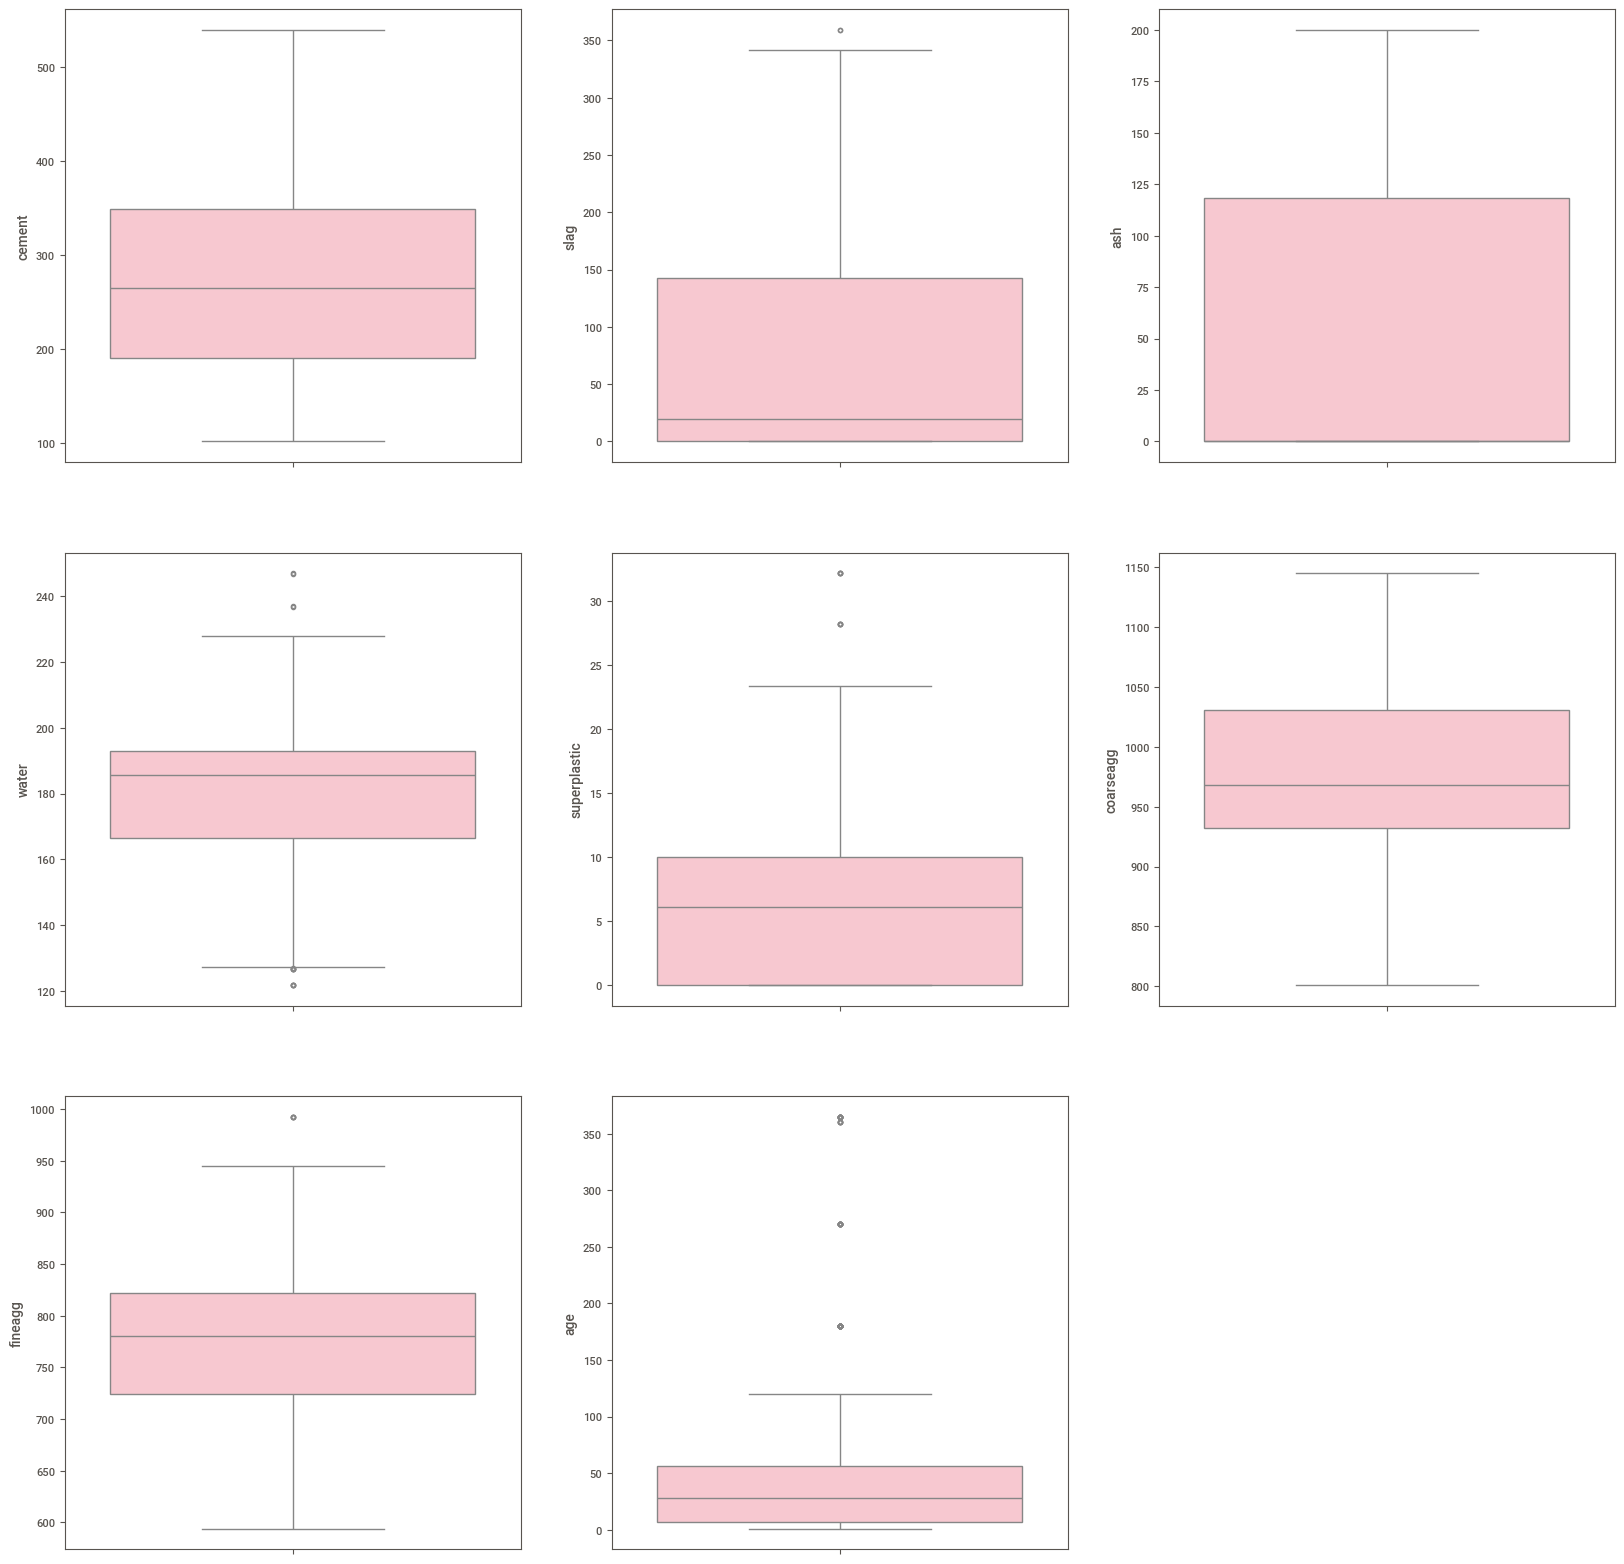

In [17]:
plt.figure(figsize=(20,20))
plotnumber = 1
for i in df1:
    plt.subplot(3,3,plotnumber)
    sns.boxplot(df[i], color= 'pink')
    plotnumber += 1
plt.tight_layout


In [18]:
df1

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [19]:
def compute_stats(df1):
    stats_df1 = pd.DataFrame(index=df1.columns)
    stats_df1['Q1'] = df1.quantile(0.25)
    stats_df1['Q3'] = df1.quantile(0.75)
    stats_df1['IQR'] = stats_df1['Q3'] - stats_df1['Q1']
    stats_df1['LL'] = stats_df1['Q1'] - 1.5 * stats_df1['IQR']
    stats_df1['UL'] = stats_df1['Q3'] + 1.5 * stats_df1['IQR']

    LI = {}  # Initialize as dictionary
    UL = {}

    for col in df1.columns:
        LI[col] = (df1[col] < stats_df1.loc[col, 'LL']).sum()
        UL[col] = (df1[col] > stats_df1.loc[col, 'UL']).sum()

    # Optionally include LI and UL in stats_df1 if needed:
    stats_df1['LO'] = pd.Series(LI)
    stats_df1['UO'] = pd.Series(UL)

    return stats_df1
    
result = compute_stats(df1)
print(result)

                 Q1      Q3    IQR      LL       UL  LO  UO
cement        190.7   349.0  158.3  -46.75   586.45   0   0
slag            0.0   142.5  142.5 -213.75   356.25   0   2
ash             0.0   118.3  118.3 -177.45   295.75   0   0
water         166.6   192.9   26.3  127.15   232.35  11   4
superplastic    0.0    10.0   10.0  -15.00    25.00   0  10
coarseagg     932.0  1031.0   99.0  783.50  1179.50   0   0
fineagg       724.3   822.2   97.9  577.45   969.05   0   5
age             7.0    56.0   49.0  -66.50   129.50   0  59



In this dataset, no modifications were made to outliers. This decision was based on the assumption that all recorded values represent real-world concrete mix conditions. Since concrete strength can vary widely depending on mix design and curing time, the observed extreme values are likely valid and informative rather than errors. Removing or altering them could lead to a loss of important information and reduce the model’s ability to generalize to uncommon but realistic scenarios.


### 4.4 Scaling

In [20]:
from sklearn.preprocessing import RobustScaler
RS= RobustScaler()

In [21]:
for i in df1:
    df[i] = RS.fit_transform(df1[[i]])

In [22]:
df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,1.737208,-0.140351,0.000000,-0.901141,-0.36,0.727273,-1.062308,0.000000,79.99
1,1.737208,-0.140351,0.000000,-0.901141,-0.36,0.878788,-1.062308,0.000000,61.89
2,0.426406,0.859649,0.000000,1.608365,-0.61,-0.363636,-1.899898,4.938776,40.27
3,0.426406,0.859649,0.000000,1.608365,-0.61,-0.363636,-1.899898,6.877551,41.05
4,-0.419457,0.788772,0.000000,0.239544,-0.61,0.105051,0.464760,6.775510,44.30
...,...,...,...,...,...,...,...,...,...
1025,0.072015,0.673684,0.763314,-0.231939,0.28,-0.988889,-0.119510,0.000000,44.28
1026,0.361339,-0.140351,0.977177,0.391635,0.43,-1.516162,0.341164,0.000000,31.18
1027,-0.735944,0.837895,0.918005,0.266160,0.00,-0.763636,0.000000,0.000000,23.70
1028,-0.668983,1.169825,0.000000,-0.384030,0.52,0.218182,0.090909,0.000000,32.77


### 4.5 Correlation

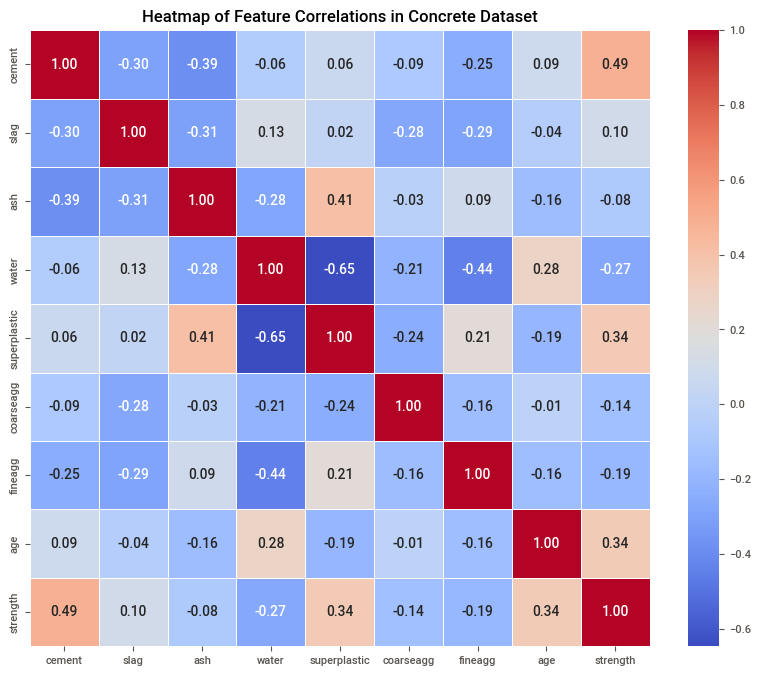

In [23]:
correlation_matrix = df.corr()

# Set plot size
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Title
plt.title("Heatmap of Feature Correlations in Concrete Dataset")

# Show the plot
plt.show()

## 5. Training and Splitting the Data

#### 5.1 Defining x and y

In [24]:
x = df.drop('strength', axis=1)
x

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,1.737208,-0.140351,0.000000,-0.901141,-0.36,0.727273,-1.062308,0.000000
1,1.737208,-0.140351,0.000000,-0.901141,-0.36,0.878788,-1.062308,0.000000
2,0.426406,0.859649,0.000000,1.608365,-0.61,-0.363636,-1.899898,4.938776
3,0.426406,0.859649,0.000000,1.608365,-0.61,-0.363636,-1.899898,6.877551
4,-0.419457,0.788772,0.000000,0.239544,-0.61,0.105051,0.464760,6.775510
...,...,...,...,...,...,...,...,...
1025,0.072015,0.673684,0.763314,-0.231939,0.28,-0.988889,-0.119510,0.000000
1026,0.361339,-0.140351,0.977177,0.391635,0.43,-1.516162,0.341164,0.000000
1027,-0.735944,0.837895,0.918005,0.266160,0.00,-0.763636,0.000000,0.000000
1028,-0.668983,1.169825,0.000000,-0.384030,0.52,0.218182,0.090909,0.000000


In [25]:
y = df.strength
y

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: strength, Length: 1005, dtype: float64

#### 5.2 Test Train Split

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.25, random_state=42)

In [28]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(753, 8)
(252, 8)
(753,)
(252,)


In [29]:
y_test

951    19.01
654    24.29
706    26.32
538    34.57
389    44.13
       ...  
118    60.29
965    56.62
78     28.10
87     24.40
612    25.97
Name: strength, Length: 252, dtype: float64

## 6. Model Creation

### 6.1 Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [31]:
LR.fit(x_train, y_train)

LinearRegression()

In [32]:
y_pred_LR = LR.predict(x_test)
y_pred_LR

array([23.42661316, 16.67796207, 22.81286735, 37.4970169 , 42.4998283 ,
       22.12026914, 14.77592553, 44.4722906 , 33.19928537, 50.20692281,
       33.77032329, 28.61371239, 45.14075879, 50.82544774, 28.73558438,
       21.03478988, 32.86253292, 43.85970322, 37.53426894, 51.30564685,
       32.98464055, 13.95291572, 30.40889711, 29.76962688, 13.35267192,
       34.79548336, 46.87022227, 33.80291915, 30.49416255, 49.02897391,
       40.0519407 , 45.89563427, 62.20280337, 38.0522593 , 25.06059876,
       66.71735887, 38.02983861, 35.4508719 , 36.0735873 , 69.47009644,
       34.59366107, 28.89850439, 37.2174616 , 39.442322  , 44.89712441,
       44.87057168, 50.82797144, 23.82231383, 54.16370479, 32.91286704,
       32.18685918, 47.08566907, 29.29884875, 23.50568797, 21.22243667,
       31.35088386, 50.89746119, 21.55416339, 41.18053449, 59.26238238,
       31.51550077, 30.14519165, 29.85649215, 30.86182412, 52.42618547,
       55.5922215 , 33.32398514, 31.76183281, 50.13396833, 58.73

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [34]:
r2 = r2_score(y_test, y_pred_LR)
r2

0.5644991091885496

In [35]:
adj_r2 = 1-(1-r2)*(1005-1)/(1005-8-1)
adj_r2

0.5610011100655661

### 6.2 KNN

In [36]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

In [37]:
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [38]:
y_pred_knn = knn.predict(x_test)
y_pred_knn

array([26.404, 21.358, 28.502, 25.14 , 35.936, 24.224, 12.228, 32.138,
       24.88 , 34.66 , 31.282, 21.282, 34.45 , 40.286, 23.86 , 18.46 ,
       37.212, 46.354, 47.592, 42.82 , 36.52 , 12.49 , 36.828, 27.714,
       11.79 , 30.906, 66.614, 34.152, 29.244, 53.88 , 34.252, 41.13 ,
       61.26 , 41.78 , 14.474, 61.26 , 41.146, 49.174, 39.314, 72.44 ,
       36.092, 24.106, 28.478, 42.294, 53.04 , 50.278, 66.26 , 27.234,
       52.406, 50.478, 25.786, 43.432, 39.524, 16.688, 19.406, 36.794,
       50.838, 14.794, 33.028, 49.95 , 24.624, 39.08 , 35.532, 34.998,
       42.77 , 53.662, 46.646, 44.846, 45.544, 58.038, 50.49 , 30.834,
       26.412, 46.646, 13.524, 15.788, 40.286, 25.088, 45.424, 19.396,
       42.72 , 22.79 , 36.664, 38.184, 33.06 , 23.522, 23.432, 42.214,
       32.43 , 19.322, 35.582, 27.034, 38.55 , 46.438, 19.54 , 40.898,
       43.726, 32.924, 34.66 , 46.382, 47.432, 21.378, 16.554, 14.598,
       12.724, 29.346, 31.822, 44.002, 27.492, 30.014, 22.456, 59.638,
      

In [39]:
r2 = r2_score(y_test, y_pred_knn)
r2

0.7241610444798812

In [40]:
print("R2 Adj =", 1-(1-(r2_score(y_test, y_pred_knn)))*(1005-1)/(1005-8-1))
#r2_adj = (1-r2)*(n-1)/(n- n_features - 1)

R2 Adj = 0.7219454705399605


### 6.3 Decision Tree Regressor

In [41]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state = 11)

In [42]:
dt.fit(x_train,y_train)

DecisionTreeRegressor(random_state=11)

In [43]:
y_pred_dt = dt.predict(x_test)
y_pred_dt

array([19.01 , 20.59 , 17.96 , 42.42 , 39.38 , 30.44 , 22.35 , 21.92 ,
       33.7  , 35.3  , 28.99 , 22.63 , 39.49 , 45.015, 30.22 , 17.54 ,
       39.38 , 52.2  , 51.04 , 34.9  , 33.8  , 13.71 , 40.23 , 31.64 ,
        6.47 , 34.67 , 53.39 , 34.67 ,  7.4  , 47.28 , 54.32 , 58.78 ,
       50.51 , 42.92 , 15.05 , 37.8  , 49.77 , 49.97 , 43.58 , 75.5  ,
       44.52 , 30.14 , 36.99 , 41.05 , 50.08 , 44.14 , 54.9  , 36.44 ,
       56.4  , 46.24 , 26.26 , 54.32 , 37.72 ,  9.56 , 24.05 , 37.42 ,
       53.58 , 10.39 , 39.36 , 56.14 , 33.05 , 38.56 , 43.25 , 30.12 ,
       45.3  , 59.59 , 45.37 , 21.54 , 62.94 , 47.22 , 63.4  , 36.97 ,
       29.65 , 37.68 , 14.8  ,  8.49 , 30.19 , 13.46 , 38.41 , 17.54 ,
       53.52 , 27.92 , 39.36 , 39.94 , 23.52 , 12.18 , 33.06 , 39.42 ,
       34.67 , 17.34 , 34.49 , 19.99 , 28.63 , 39.16 , 18.91 , 47.4  ,
       43.58 , 49.77 , 39.4  , 46.93 , 61.24 , 22.53 , 17.22 , 17.34 ,
       15.69 , 21.78 , 35.76 , 43.58 , 19.99 , 23.79 , 30.14 , 65.91 ,
      

In [44]:
r2 = r2_score(y_test, y_pred_dt)
r2

0.8582495890902191

In [45]:
print("R2 Adj =", 1-(1-(r2_score(y_test, y_pred_dt)))*(1005-1)/(1005-8-1))
#r2_adj = (1-r2)*(n-1)/(n- n_features - 1)

R2 Adj = 0.8571110315728714


### 6.4 Gradient Boosting

In [46]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(random_state=42)

In [47]:
gb.fit(x_train,y_train)

GradientBoostingRegressor(random_state=42)

In [48]:
y_pred_gb = gb.predict(x_test)
y_pred_gb

array([25.58754304, 24.24574317, 22.80965325, 39.24442115, 47.46060556,
       31.78650107, 22.64797528, 24.16338481, 33.17457696, 32.71754115,
       27.43784415, 32.94392352, 38.9418067 , 43.83175783, 34.63398796,
       16.01702474, 37.03445611, 50.94554845, 46.75384991, 37.93143824,
       36.51520091,  9.5950094 , 42.45473574, 32.41604062,  7.63872973,
       36.55812268, 59.14569912, 34.54610405, 19.54464253, 48.35471532,
       46.32423117, 50.36549441, 47.88373949, 44.98236948, 14.32358478,
       39.38522269, 44.56686204, 45.56293234, 41.35077423, 79.86013683,
       38.88275712, 30.27645776, 39.58985836, 46.15900311, 53.71310838,
       50.03354595, 62.18470402, 25.67740204, 57.45553701, 38.19989243,
       21.08653227, 54.73613169, 35.4886646 ,  9.28925526, 32.19889684,
       35.39041335, 53.21238426, 11.97556276, 35.91919376, 51.02652345,
       35.57125403, 37.16386614, 37.92929481, 32.5758827 , 44.76949199,
       54.12111581, 38.75221006, 39.0089863 , 56.09446849, 51.30

In [49]:
r2 = r2_score(y_test, y_pred_gb)
r2

0.9003651299608258

In [50]:
print("R2 Adj =", 1-(1-(r2_score(y_test, y_pred_gb)))*(1005-1)/(1005-8-1))
#r2_adj = (1-r2)*(n-1)/(n- n_features - 1)

R2 Adj = 0.8995648498801899


### 6.5 Random Forest

In [51]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

In [52]:
rf.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [53]:
y_pred_rf = rf.predict(x_test)
y_pred_rf

array([21.3861    , 26.7656    , 22.7724    , 34.00375   , 46.5745    ,
       33.1194    , 23.5602    , 22.2075    , 32.2151    , 33.1859    ,
       29.0898    , 29.6499    , 40.1645    , 44.73612024, 32.8335    ,
       15.8223    , 38.0313    , 49.7157    , 48.101     , 42.87238333,
       35.3183    , 11.5576    , 46.1909    , 34.3693    ,  9.3822    ,
       36.9258    , 62.6118    , 35.8157    , 15.4716    , 51.151     ,
       50.5762    , 56.4886    , 49.64449167, 42.9755    , 15.5191    ,
       38.65063333, 46.0568    , 48.4064    , 42.8926    , 72.7408    ,
       38.9903    , 25.27305714, 36.15350667, 44.2431    , 54.0867    ,
       49.2313    , 64.799     , 30.7809    , 61.2932    , 42.8487    ,
       20.0947    , 54.4349    , 41.379     , 11.3176    , 28.2224    ,
       39.6176    , 57.823     , 10.9105    , 37.9368    , 52.3174    ,
       31.1937    , 36.3882    , 40.6686    , 30.2703    , 42.0634    ,
       58.2896    , 40.5735    , 36.9058    , 61.655015  , 50.51

In [54]:
r2 = r2_score(y_test, y_pred_rf)
r2

0.8993624708658099

In [55]:
print("R2 Adj =", 1-(1-(r2_score(y_test, y_pred_rf)))*(1005-1)/(1005-8-1))
#r2_adj = (1-r2)*(n-1)/(n- n_features - 1)

R2 Adj = 0.898554137298467


### 6.6 XGBoosting

In [56]:
from xgboost import XGBRegressor
xgb = XGBRegressor()

In [57]:
xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [58]:
y_pred_xgb = xgb.predict(x_test)

In [59]:
r2 = r2_score(y_test, y_pred_xgb)
r2

0.926256343418015

In [60]:
print("R2 Adj =", 1-(1-(r2_score(y_test, y_pred_xgb)))*(1005-1)/(1005-8-1))
#r2_adj = (1-r2)*(n-1)/(n- n_features - 1)

R2 Adj = 0.9256640248912521


### 7. Model Comparison

In [61]:
models = {
    "Linear Regression": LinearRegression(),
    "KNN" : KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(random_state=11),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42),
}

In [62]:
model_results = {}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r2 =  r2_score(y_test, y_pred)
    model_results[name] = r2
                
    print(f"\n{name} R2 Score: {r2:.4f}")
    print("---------------------------------------------------------")


Linear Regression R2 Score: 0.5645
---------------------------------------------------------

KNN R2 Score: 0.7242
---------------------------------------------------------

Decision Tree R2 Score: 0.8582
---------------------------------------------------------

Random Forest R2 Score: 0.8994
---------------------------------------------------------

Gradient Boosting R2 Score: 0.9004
---------------------------------------------------------

XGBoost R2 Score: 0.9263
---------------------------------------------------------


Among the various machine learning models tested, Decision Tree Regressor, Random Forest, Gradient Boosting, and XGBoost showed higher accuracy. Therefore, we selected these models for hyperparameter tuning.

## 8. Hyperparameter Tuning


### 8.1 Decision Tree

In [63]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [64]:
from sklearn.metrics import mean_squared_error, r2_score

In [65]:
param_grid = {
    'splitter': ['best','random'],
    'max_depth': [3, 5, 10,20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

In [66]:
grid_dt = GridSearchCV(estimator=dt,
                       param_grid=param_grid,
                       scoring='r2',
                       cv=5,
                       verbose=3,
                       n_jobs=-1)

In [67]:
grid_dt.fit(x_train, y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=11), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 20, None],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='r2', verbose=3)

In [68]:
best_dtree = grid_dt.best_estimator_

In [69]:
y_pred_dt = best_dtree.predict(x_test)

In [70]:
rmse = mean_squared_error(y_test, y_pred_dt, squared=False)
r2 = r2_score(y_test, y_pred_dt)

In [71]:
print("📌 Best Parameters for Decision Tree:", grid_dt.best_params_)
print(f"📈 R² Score  : {r2:.4f}")
print(f"📉 RMSE      : {rmse:.4f}")

📌 Best Parameters for Decision Tree: {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
📈 R² Score  : 0.8229
📉 RMSE      : 7.1618


In [72]:
grid_dt.best_params_

{'max_depth': 20,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'random'}

In [73]:
dt1 = DecisionTreeRegressor(random_state=11,max_depth= 20 ,max_features= None,min_samples_leaf= 1,
                           min_samples_split= 2,splitter= 'random')
dt1.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=20, random_state=11, splitter='random')

In [74]:
y_pred_dt1 = dt1.predict(x_test)
y_pred_dt1

array([19.01 , 23.74 , 25.46 , 50.51 , 44.09 , 32.88 , 17.96 , 26.26 ,
       33.7  , 24.1  , 28.99 , 22.63 , 39.49 , 45.015, 24.9  , 14.2  ,
       37.23 , 52.82 , 37.27 , 33.4  , 33.8  ,  7.84 , 40.23 , 30.85 ,
       10.03 , 34.67 , 57.92 , 34.67 , 19.42 , 56.7  , 79.99 , 48.4  ,
       52.61 , 42.92 , 15.05 , 37.8  , 49.77 , 49.97 , 43.58 , 75.5  ,
       44.52 , 18.13 , 34.67 , 41.05 , 48.97 , 44.14 , 57.92 , 36.44 ,
       79.99 , 46.24 , 21.82 , 54.32 , 30.08 ,  4.83 , 17.6  , 37.44 ,
       67.87 , 13.66 , 39.36 , 53.69 , 32.84 , 38.56 , 35.76 , 30.12 ,
       38.22 , 54.77 , 42.92 , 40.71 , 62.94 , 55.16 , 63.4  , 36.97 ,
       27.22 , 42.92 , 18.91 ,  8.37 , 30.19 , 13.46 , 33.12 , 17.54 ,
       53.52 , 22.53 , 44.3  , 39.94 , 19.35 , 21.54 , 33.06 , 44.28 ,
       34.67 , 22.44 , 34.49 , 23.7  , 28.63 , 39.16 , 18.91 , 48.28 ,
       43.58 , 38.22 , 41.67 , 51.73 , 61.24 , 22.53 , 10.03 , 17.34 ,
       21.92 , 21.78 , 37.33 , 43.58 , 19.99 , 23.79 , 26.06 , 57.22 ,
      

In [75]:
print("R2 Score =", r2_score(y_test, y_pred_dt1))
print("R2 Adj =", 1-(1-(r2_score(y_test, y_pred_dt1)))*(1005-1)/(1005-8-1)) 

R2 Score = 0.8229450150928349
R2 Adj = 0.8215228867000063


### 8.2 Random Forest 

In [76]:
from sklearn.metrics import mean_squared_error, r2_score

In [77]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 500, 1000],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Model
rf_model = RandomForestRegressor(random_state=42)

# Grid Search
RCV = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid,
    cv=5,
    verbose=3,
    scoring='r2',
    n_jobs=-1
)

# Fit
RCV.fit(x_train, y_train)

# Best Estimator
best_rf = RCV.best_estimator_
y_pred_best_rf = best_rf.predict(x_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred_best_rf)
r2 = r2_score(y_test, y_pred_best_rf)

print("Best Parameters:", RCV.best_params_)
print("Tuned Random Forest MSE:", mse)
print("Tuned Random Forest R² Score:", r2)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10, 'bootstrap': False}
Tuned Random Forest MSE: 28.588772449333778
Tuned Random Forest R² Score: 0.9013138928296287


### 8.3 Gradient Boosting

In [78]:
model = GradientBoostingRegressor()
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

In [79]:
random_search = RandomizedSearchCV(estimator=model,
    param_distributions=param_dist,
    n_iter=50,               # Number of different combinations to try
    cv=5,                    # 5-fold cross-validation
    scoring='r2',            # or 'neg_mean_squared_error'
    random_state=42,
    n_jobs=-1                # Use all processors
)

# Fit
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2,
                                                          0.3],
                                        'max_depth': [3, 5, 7],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 1000],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='r2')

In [80]:
random_search.best_params_

{'subsample': 0.6,
 'n_estimators': 200,
 'min_samples_split': 10,
 'max_features': None,
 'max_depth': 5,
 'learning_rate': 0.1}

In [81]:
gb1 = GradientBoostingRegressor(random_state=42,subsample=0.8,
 n_estimators= 1000,
 min_samples_split= 5,
 max_features= 'log2',
 max_depth= 5,
 learning_rate= 0.05)
gb1.fit(x_train,y_train)
y_pred_gb1 = gb1.predict(x_test)
y_pred_gb1

array([17.94567895, 22.91309131, 24.47545814, 34.87989155, 44.2263578 ,
       30.0412228 , 19.24304092, 23.37357648, 31.72299147, 26.35278332,
       27.81120936, 29.36377807, 40.60806427, 45.0817098 , 34.66242722,
       16.02514939, 38.14987227, 51.96739297, 42.60746774, 38.69760386,
       34.93784645,  8.3604415 , 45.33956254, 33.27830361,  7.49625771,
       40.30656167, 64.95541168, 35.24296229, 19.41126102, 50.96624028,
       47.35275912, 52.55955303, 48.37775805, 48.62012044, 15.50489467,
       40.23704429, 48.32599986, 56.689211  , 43.27225187, 77.70063792,
       38.63432726, 26.71382902, 42.30772346, 42.87165422, 57.54885342,
       46.90837839, 69.72277974, 34.37371875, 62.15097051, 44.94436438,
       23.6150998 , 52.65062263, 37.54739463,  8.99523858, 24.26976988,
       37.00296126, 61.07073396, 11.87716155, 41.25186025, 54.66558465,
       32.45323105, 32.13909173, 39.50392853, 30.53978497, 39.09004278,
       61.37100618, 47.65818654, 36.63844717, 62.01181057, 50.70

In [82]:
print("R2 Score =", r2_score(y_test, y_pred_gb1))
print("R2 Adj =", 1-(1-(r2_score(y_test, y_pred_gb1)))*(1005-1)/(1005-8-1)) #r2_adj = (1-r2)*(n-1)/(n- n_features - 1)

R2 Score = 0.9390313283087981
R2 Adj = 0.938541620102443


### 8.4 XGBoost

In [83]:
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# Hyperparameter distribution
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [1, 3, 5, 7, 11,],
    'subsample': [0.2, 0.3, 0.4, 0.5, 0.6, 0.8, 1.0],          
    'min_child_weight': [1, 2, 3, 4, 5 ,6 ,7 ,8],
    'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
    'n_estimators': [50,65,80,100,115,130,150],
    'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
    'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]           
}

# Randomized search
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='r2',     # Or 'neg_mean_squared_error'
    n_jobs=-1,
    random_state=42
)

# Fit model
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2,
                                                          0.3],
                                        'max_depth': [1, 3, 5, 7, 11],
                                        'min_child_weight': [1, 2, 3, 4, 5, 6,
                                                             7, 8],
                                        'n_estimators': [50, 65, 80, 100, 115,
                                                         130, 150],
                                        'reg_alpha': [0, 0.1, 0.2, 0.4, 0.8,
                                                      1.6, 3.2, 6.4, 12.8, 25.6,
                                                      51.2, 102.4, 200],
                                        'reg_lambda': [0, 0.1, 0.2, 0.4, 0.8,
                                                       1.6, 3.2, 6.4, 12.8,
                                                       25.6, 51.2, 102.4, 200],
                                        'subsample': [0.2, 0.3, 0.4, 0.5, 0.6,
                                                      0.8, 1.0]},
                   random_state=42, scoring='r2')

In [84]:
random_search.best_params_

{'subsample': 0.6,
 'reg_lambda': 1.6,
 'reg_alpha': 0,
 'n_estimators': 115,
 'min_child_weight': 7,
 'max_depth': 7,
 'learning_rate': 0.2,
 'gamma': 3.2}

In [85]:
xgb1 = XGBRegressor(random_state=42,subsample= 0.6,
 reg_lambda= 1.6,
 reg_alpha= 0,
 n_estimators= 115,
 min_child_weight= 7,
 max_depth= 7,
 learning_rate= 0.2,
 gamma= 3.2)

In [86]:
xgb1.fit(x_train, y_train)
y_pred_xgb1 = xgb1.predict(x_test)

In [87]:
print("R2 Score =", r2_score(y_test, y_pred_xgb1))
print("R2 Adj =", 1-(1-(r2_score(y_test, y_pred_xgb1)))*(1005-1)/(1005-8-1)) #r2_adj = (1-r2)*(n-1)/(n- n_features - 1)

R2 Score = 0.9341380183548089
R2 Adj = 0.9336090064540443


In [89]:
# Define tuned models
models_H = {
    "Decision Tree Regressor (Tuned)": DecisionTreeRegressor(random_state=11,max_depth= 20 ,max_features= None,min_samples_leaf= 1,
                           min_samples_split= 2,splitter= 'random'),
    
    "Random Forest (Tuned)": RandomForestRegressor(
        random_state=42,n_estimators= 1000, min_samples_split= 5, min_samples_leaf= 2, max_features='log2', max_depth=10, bootstrap= False
    ),
    
    "Gradient Boosting (Tuned)": GradientBoostingRegressor(
        random_state=42, subsample=0.8, n_estimators= 1000,
 min_samples_split= 5,
 max_features= 'log2',
 max_depth= 5,
 learning_rate= 0.05
    ),
    
    "XGBoost (Tuned)": XGBRegressor(
        random_state=42, subsample= 0.6,
 reg_lambda= 1.6,
 reg_alpha= 0,
 n_estimators= 115,
 min_child_weight= 7,
 max_depth= 7,
 learning_rate= 0.2,
 gamma= 3.2 )
}

# Evaluate models
model_H_results = {}

for name, model in models_H.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    model_H_results[name] = r2
    print(f"{name} R² Score: {r2:.4f}")

Decision Tree Regressor (Tuned) R² Score: 0.8229
Random Forest (Tuned) R² Score: 0.8902
Gradient Boosting (Tuned) R² Score: 0.9390
XGBoost (Tuned) R² Score: 0.9341


## 9. Conclusion